In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

In [9]:
food = pd.read_csv('FoodSrvcByCounty.txt', sep = '\t')
food.head()

,County,State,FoodServices-97,FoodServices-2002,FoodServices-2007
0,UNITED STATES,NaN,545068,565590,634361
1,ALABAMA,NaN,6955,7075,8093
2,Autauga,AL,50,67,92
3,Baldwin,AL,303,319,414
4,Barbour,AL,42,44,45


In [22]:
states = food.copy()
states = states.loc[states['State'].isna()]
states = states[states['County'] != 'UNITED STATES']
states = states.drop('State', axis=1)
states = states.rename(columns={'County':'State'})
states.reset_index(drop=True,inplace=True)
states.head()

,State,FoodServices-97,FoodServices-2002,FoodServices-2007
0,ALABAMA,6955,7075,8093
1,ALASKA,1763,1849,1996
2,ARIZONA,9094,9944,11610
3,ARKANSAS,4663,4659,5112
4,CALIFORNIA,62629,66568,75989


<Axes: >

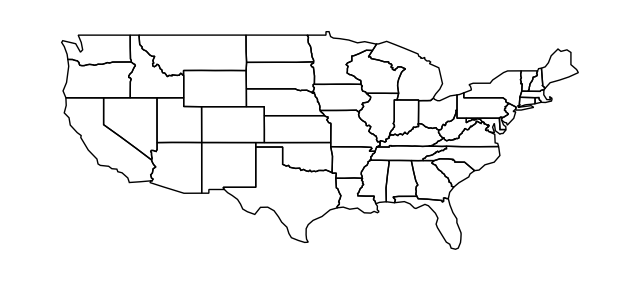

In [6]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

In [7]:
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05024 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [25]:
np.array(contiguous_usa['state'])

array(['Minnesota', 'Montana', 'North Dakota', 'Idaho', 'Washington',
       'Arizona', 'California', 'Colorado', 'Nevada', 'New Mexico',
       'Oregon', 'Utah', 'Wyoming', 'Arkansas', 'Iowa', 'Kansas',
       'Missouri', 'Nebraska', 'Oklahoma', 'South Dakota', 'Louisiana',
       'Texas', 'Connecticut', 'Massachusetts', 'New Hampshire',
       'Rhode Island', 'Vermont', 'Alabama', 'Florida', 'Georgia',
       'Mississippi', 'South Carolina', 'Illinois', 'Indiana', 'Kentucky',
       'North Carolina', 'Ohio', 'Tennessee', 'Virginia', 'Wisconsin',
       'West Virginia', 'Delaware', 'District of Columbia', 'Maryland',
       'New Jersey', 'New York', 'Pennsylvania', 'Maine', 'Michigan'],
      dtype=object)

In [37]:
contiguous_usa.shape

(49, 4)

In [35]:
states = states[~states['State'].isin(['District of Columbia','ALASKA','HAWAII'])]
                    #  |
                    # (states['State'] != 'HAWAII')]
np.array(states['State'])

array(['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA',
       'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS',
       'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS',
       'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA',
       'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO',
       'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA',
       'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT',
       'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'],
      dtype=object)

In [36]:
states.shape

(49, 4)

In [39]:
contiguous_usa['state'] = contiguous_usa['state'].str.upper()
contiguous_usa = contiguous_usa.rename(columns={'state':'State'})
np.array(contiguous_usa['State'])

array(['MINNESOTA', 'MONTANA', 'NORTH DAKOTA', 'IDAHO', 'WASHINGTON',
       'ARIZONA', 'CALIFORNIA', 'COLORADO', 'NEVADA', 'NEW MEXICO',
       'OREGON', 'UTAH', 'WYOMING', 'ARKANSAS', 'IOWA', 'KANSAS',
       'MISSOURI', 'NEBRASKA', 'OKLAHOMA', 'SOUTH DAKOTA', 'LOUISIANA',
       'TEXAS', 'CONNECTICUT', 'MASSACHUSETTS', 'NEW HAMPSHIRE',
       'RHODE ISLAND', 'VERMONT', 'ALABAMA', 'FLORIDA', 'GEORGIA',
       'MISSISSIPPI', 'SOUTH CAROLINA', 'ILLINOIS', 'INDIANA', 'KENTUCKY',
       'NORTH CAROLINA', 'OHIO', 'TENNESSEE', 'VIRGINIA', 'WISCONSIN',
       'WEST VIRGINIA', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'MARYLAND',
       'NEW JERSEY', 'NEW YORK', 'PENNSYLVANIA', 'MAINE', 'MICHIGAN'],
      dtype=object)

In [45]:
geo_df = pd.merge(states, contiguous_usa, on='State')
geo_df = gpd.GeoDataFrame(geo_df, geometry='geometry')
geo_df.head()

,State,FoodServices-97,FoodServices-2002,FoodServices-2007,adm1_code,population,geometry
0,ALABAMA,6955,7075,8093,USA-3541,4779736,"POLYGON ((-85.05442 31.1087, -85.00519 30.9906..."
1,ARIZONA,9094,9944,11610,USA-3520,6392017,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
2,ARKANSAS,4663,4659,5112,USA-3528,2915918,"POLYGON ((-89.66292 36.02307, -89.67351 35.94,..."
3,CALIFORNIA,62629,66568,75989,USA-3521,37253956,"POLYGON ((-114.3549 34.46467, -114.16597 34.27..."
4,COLORADO,10073,10799,12075,USA-3522,5029196,"POLYGON ((-102.05017 40.00082, -102.04012 38.4..."


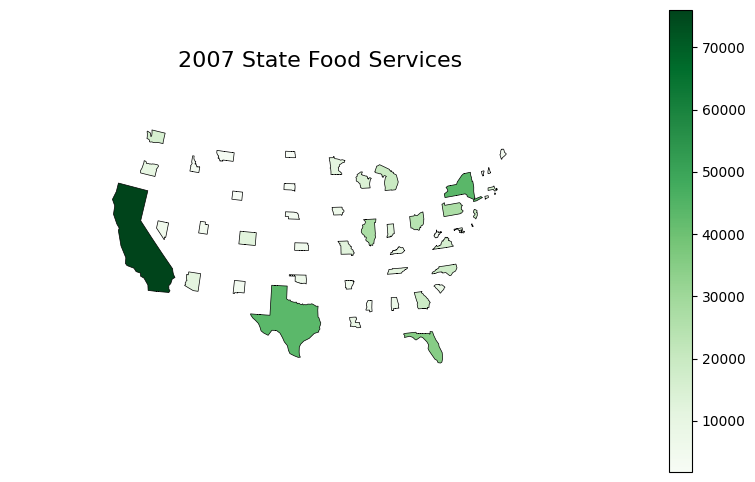

In [68]:
gplt.cartogram(
    geo_df,
    scale="FoodServices-2007",
    projection=gcrs.AlbersEqualArea(),
    edgecolor='black',
    linewidth=0.5,
    hue="FoodServices-2007",   
    cmap='Greens',
    legend_var='hue',
    legend=True,
    figsize=(10,6)
)
plt.title("2007 State Food Services", fontsize=16)

# Display the map
plt.show()